# Solving The Travelling Salesperson Problem (TSP)


"A salesperson has to visit a number of addresses, they must visit each address once and once only. How do we find the sortest route for the salesperson?"

There are lots of everyday problems based on the TSP such as home deliveries, so being able to solve the TSP is very useful.

This workshop will explain a number of ways in which we can solve the TSP.  

We'll be using the Python language to help us.

The workshop is divided into cells (like this one), some of the cells are just for reading (like this) and some have some Python code in them (like the one below). When you've finished reading this, press the "run" button (at the top) and we'll move onto the next cell, press the run button again to run the Python code in the next cell.

In [2]:
import tspcode as tsp
tsp.setup()

Don't worry about the code in the cell above, it is setting up a problem for us to solve.

## 1. A Problem for Us to Solve

In the center of Edinburgh we need to make 26 deliveries (A-Z), we start and finish from Edinburgh Castle. We want to make the deliveries travelling the shortest distance possible.


## Task: can you re-arrange the route to make it shorter, what's the shortest route that you can find?

The cell below creates a route from A-Z via each delivery in order, then it prints out the distance of the route, change the order of the visits to see if you can make the route shorter. The cell underneath draws a map of the route which you might find useful

In [9]:
route = 'ABCDEFGIJKLMNOPQRSTUVWHXYZ'
print(tsp.measure (route))

36.329573656


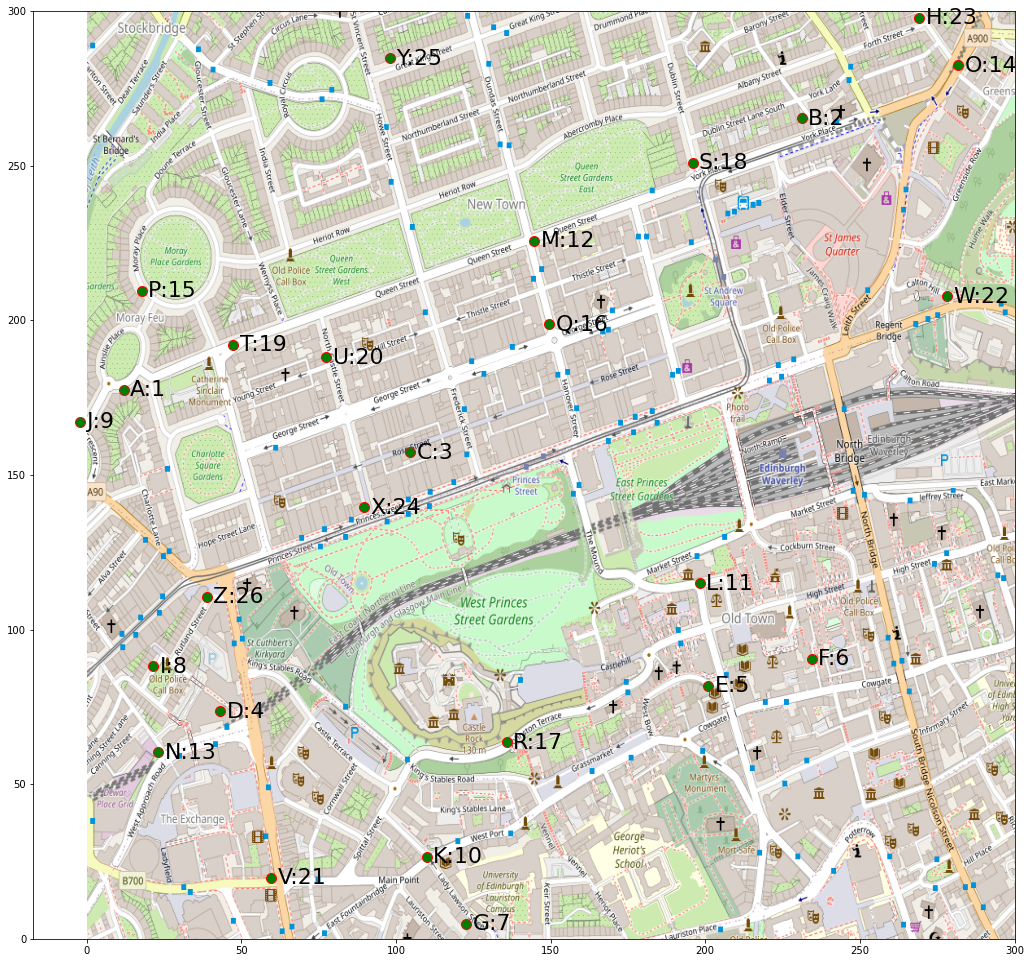

In [10]:
tsp.drawMap(route)

The problem that we have is that there are far too many possible routes for us to try each one. 

How many routes are there?

If there were 4 visits A-D then the possible routes would be :

ABCD  ABDC
ACDB  ACBD
ADBC  ADCB
BACD  BADC
BCAD  BCDA
BDAC  BDCA
CABD  CADB
CBAD  CBDA
CDAB  CDBA
DABC  DACB
DBAC  DBCA
DCAB  DCBA

The number of possible routes (24) can be worked out by 4x3x2x1 = 24

For our problem with 26 visits there would be: 40329146112660570000000000  !!!


That's too many routes for us to check each one, and it would take the computer several hours to work through them.

##  2. Building a route

Rather than testing every single route, we can write a program to build a route using a simple rule called the nearest neighbour heuristic. When deciding which visit to make next, always go to the closest visit available to you.

So, if we start at the Castle the nearest visit is 'R', then it is 'G' and so on.....

You can run the program in cell below. Is it better than the route you created?


In [11]:
solution = ''
remaining = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
best =''

while len(remaining) > 0:
    print(remaining)
    best, remaining = tsp.neighbour(best,remaining)
    solution = solution +best

print(tsp.measure(solution))
print(solution)


ABCDEFGHIJKLMNOPQRSTUVWXYZ
ABCDEFGHIJKLMNOPQSTUVWXYZ
ABCDEFHIJKLMNOPQSTUVWXYZ
ABCDEFHIJLMNOPQSTUVWXYZ
ABCDEFHIJLMNOPQSTUWXYZ
ABCDEFHIJLMNOPQSTUWXY
ABCDEFHJLMNOPQSTUWXY
ABCEFHJLMNOPQSTUWXY
ABCEFHJLMOPQSTUWXY
ABCEFHJLMOPQSUWXY
BCEFHJLMOPQSUWXY
BCEFHLMOPQSUWXY
BCEFHLMOQSUWXY
BCEFHLMOQSWXY
BCEFHLMOQSWY
BEFHLMOQSWY
BEFHLMOSWY
BEFHLOSWY
BEFHLOWY
EFHLOWY
EFLOWY
EFLWY
EFLY
ELY
LY
Y
14.373743870999999
RGKVZIDNTAJPUXCQMSBHOWFELY


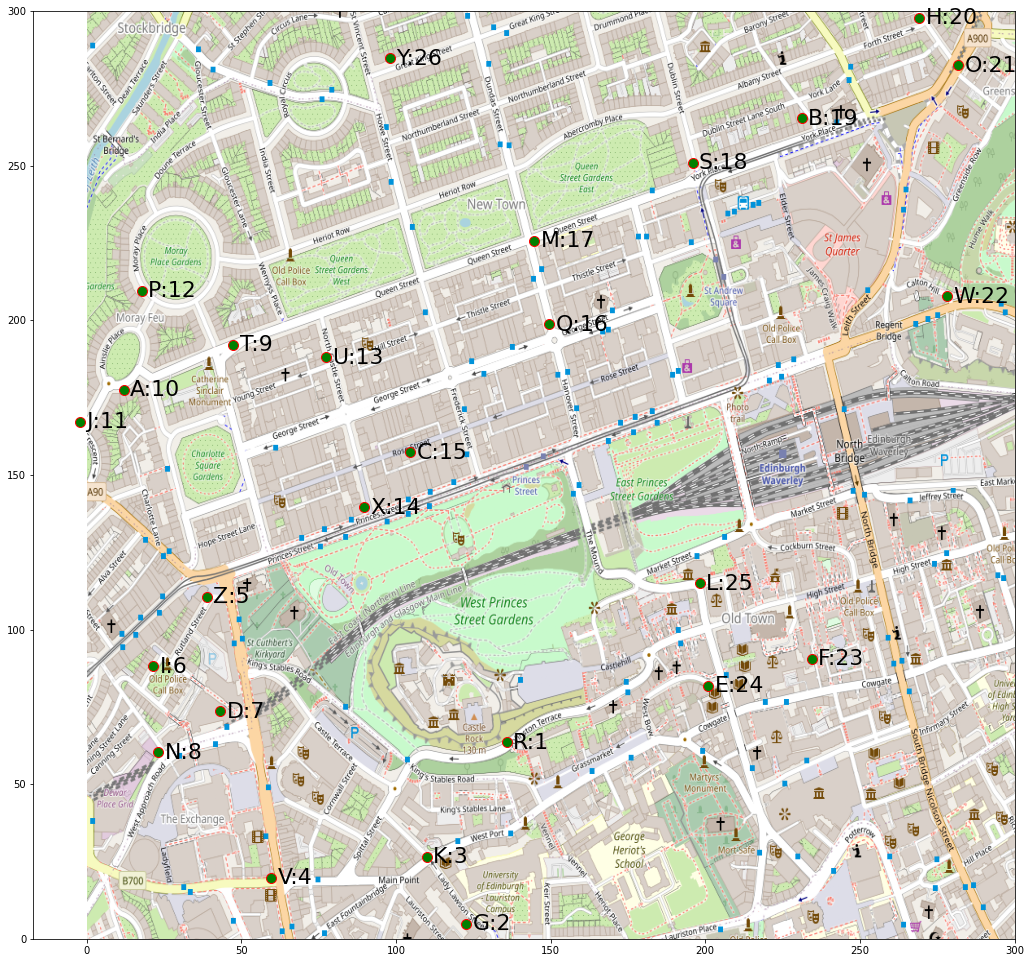

In [12]:
tsp.drawMap(solution)

## 3. A Simple hill climber.....

In [ ]:
tries = 100
solution = tsp.shuffle('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
best = tsp.measure (solution)

for x in range(0, tries):
    old = solution #solution.copy()
    solution = tsp.random_change(solution)
    n = tsp.measure (solution)
    if (n >= best):
        solution = old
    else:
        print(str(x) + " Found new best! "+ str(n))
        best = n



In [ ]:
tsp.drawMap(solution)